In [7]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

In [8]:
load_dotenv()

True

In [9]:
model=ChatOpenAI()

In [10]:
class Batsmanstats(TypedDict):
    runs:int
    balls:int
    fours:int
    sixs:int
    strike_rate:float
    bpb:float
    boundry_percent:float
    summary:str


In [37]:
def calculate_sr(state:Batsmanstats)->Batsmanstats:
   sr=(state['runs']/state['balls'])*100
   return {'strike_rate':sr}
    

In [38]:
def calculate_bpb(state:Batsmanstats)->Batsmanstats:
    bpb=state['balls']/(state['fours']+state['sixs'])
    return {'bpb':bpb}


In [39]:
def calculate_boundry_percent(state:Batsmanstats)->Batsmanstats:
    boundry_percent=(((state['fours']*4)+(state['sixs']*6))/state['runs'])*100
    return {'boundry_percent':boundry_percent}


In [40]:
def calculate_summary(state:Batsmanstats)->Batsmanstats:
    summary=f"""
Strike rate = {state['strike_rate']}  \n
balls per boundry = {state['bpb']} \n
boundry percent = {state['boundry_percent']} \n
"""
    return {'summary':summary}
    

In [41]:
graph=StateGraph(Batsmanstats)

graph.add_node('calculate_sr',calculate_sr)
graph.add_node('calculate_bpb',calculate_bpb)
graph.add_node('calculate_boundry_percent',calculate_boundry_percent)
graph.add_node('calculate_summary',calculate_summary)

graph.add_edge(START,'calculate_sr')
graph.add_edge(START,'calculate_bpb')
graph.add_edge(START,'calculate_boundry_percent')

graph.add_edge('calculate_sr','calculate_summary')
graph.add_edge('calculate_bpb','calculate_summary')
graph.add_edge('calculate_boundry_percent','calculate_summary')

graph.add_edge('calculate_summary',END)

workflow=graph.compile()






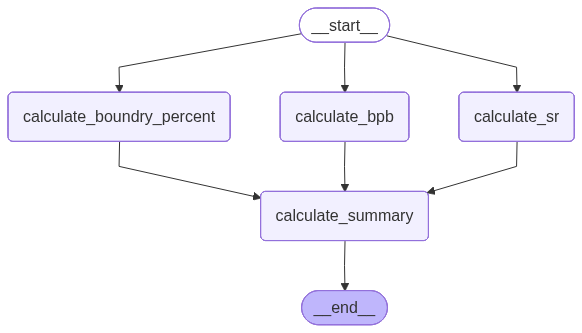

In [42]:
graph.compile()

In [44]:
initial_state={'runs':98,'balls':68,'fours':4,'sixs':6}
workflow.invoke(initial_state)


{'runs': 98,
 'balls': 68,
 'fours': 4,
 'sixs': 6,
 'strike_rate': 144.11764705882354,
 'bpb': 6.8,
 'boundry_percent': 53.06122448979592,
 'summary': '\nStrike rate = 144.11764705882354  \n\nballs per boundry = 6.8 \n\nboundry percent = 53.06122448979592 \n\n'}